In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
project_dir = 'C:\\Users\\PLDD\\python\\Python\\ML\\Kaggle\\house_price'
raw_path = os.path.join(project_dir,'data','raw')
train_path = os.path.join(raw_path, 'train.csv')
test_path = os.path.join(raw_path, 'test.csv')

 # Create data frame

Combines train and test data frame:

In [308]:
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
test_df['SalePrice'] = 0.0
df = train_df.append(test_df)

Divide year built axis by proper time range.

In [309]:
yearlable = ['1906', '1942', '1975', '1991', '2011']
yearbin = [1800,1906,1942,1975, 1991, 2011]
df['YearInt']=pd.cut(x = df['YearBuilt'].values, bins = yearbin, right = False, labels = yearlable)

Define and fill some nan value with simple NoNe that means - this property attribute is absent

In [310]:
DefSeqCat = ['Alley','BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
       'Fence', 'MiscFeature']
UndefSeqCat1 = ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd','Electrical', 'KitchenQual',
            'Functional', 'SaleType'] # there are defenetly lost elements 
UndefSeqCat2 = ['MasVnrType'] # i may just not make it clear the property of the column
UndefSeqNum = ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
               'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea']

In [311]:
replace=dict.fromkeys(DefSeqCat, 'NoNe')
df = df.fillna(replace)

Replace NAN values in 'LotFrontage' with iterpolated value.

In [328]:
#'LotConfig', 'Neighborhood','Condition1','Condition2', 'YearBuilt', 'Fence','MSZoning','YearInt'
catclass = ['Neighborhood', 'LotConfig','LotShape','YearInt']
fullclass = catclass + ['LotFrontage']
nandf = df[df['LotFrontage'].isnull()]
nandf = nandf[fullclass]
df[catclass] nandf[catclass] 


#dff = df[fullclass].dropna(axis = 0, how = 'any')
#dff = dff[dff['Neighborhood'].isin(['NAmes', 'Gilbert', 'Sawyer','CollgCr','NWAmes'])]
#pvt = dff.pivot_table(values = 'LotFrontage', index = catclass, aggfunc = [np.std, np.mean, np.size, np.min, np.max])
#pvt['RelStd', 'LotFrontage'] = (pvt['std','LotFrontage'] / pvt['mean','LotFrontage']) * 100
#pvt[pvt.notnull().all(1)]

ValueError: Can only compare identically-labeled DataFrame objects

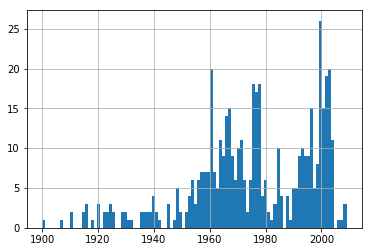

In [233]:
import matplotlib.pyplot as plt
plt.figure()
nandf = df[df['LotFrontage'].isnull()]
nandf['YearBuilt'].hist(bins = 100)
plt.show()
#plt.plot()
#nandf.pivot_table(values = 'LotFrontage', index = ['YearBuilt'], aggfunc = np.size).sort_values(by='LotFrontage', axis = 0)
#tt=nandf.pivot_table(values = 'LotFrontage', index = catclass, aggfunc = np.size)
#tt[tt['LotFrontage'].notnull()].sort_values(by='LotFrontage', axis = 0)
#tt.sort_values(by='LotFrontage', axis = 0)